## Oral Cancer Prediction


In [56]:
import glob
import numpy as np
from PIL import Image
from numpy import array
from keras.preprocessing import image
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, f1_score, recall_score, precision_score,accuracy_score
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.layers import Dropout, BatchNormalization
from keras.models import Model
from tensorflow.keras.optimizers import SGD
import tensorflow as tf
# from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.preprocessing import image_dataset_from_directory  
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications import ResNet50
import keras as k
import matplotlib.pyplot as plt 
import pandas as pd
import seaborn
from sklearn.metrics import confusion_matrix , classification_report,accuracy_score
import joblib
import warnings
from sklearn.model_selection import KFold
from sklearn.svm import SVC
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
from sklearn.tree import DecisionTreeClassifier
import joblib
warnings.filterwarnings("ignore")

In [57]:
cancer_imgs = glob.glob('../Dataset/OralCancer/cancer' + '/*.jpg')
non_cancer_imgs = glob.glob('../Dataset/OralCancer/non-cancer/' + '/*.jpg')

In [58]:
dataset = []
labels = []

for img in cancer_imgs:
  dataset.append(image.img_to_array(image.load_img(img, target_size=(64, 64))))
  labels.append(1)

for img in non_cancer_imgs:
  dataset.append(image.img_to_array(image.load_img(img, target_size=(64, 64))))
  labels.append(0)
  
dataset = array(dataset)

In [59]:
def evaluate_model(clf, X_test, y_test, model_name):
  print('--------------------------------------------')
  print('Model ', model_name)
  y_pred = clf.predict(X_test)
  f1 = f1_score(y_test, y_pred.round(), average='weighted')
  recall = recall_score(y_test, y_pred.round(), average='weighted')
  precision = precision_score(y_test, y_pred.round(), average='weighted')
 # print(classification_report(y_test, y_pred.round()))
  print("F1 Score ", f1)
  print("Recall ", recall)
  print("Precision ", precision)

Cancer Images: 


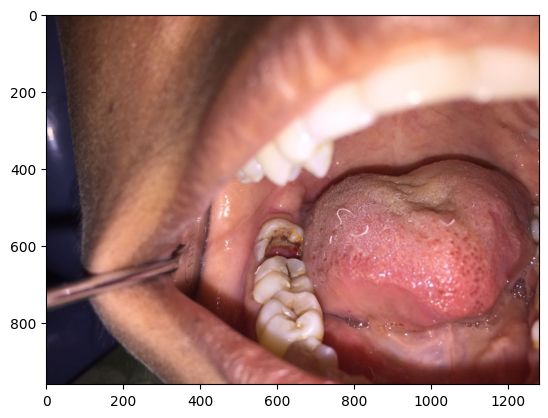

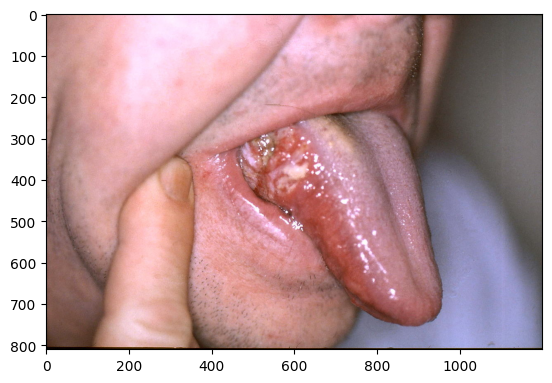

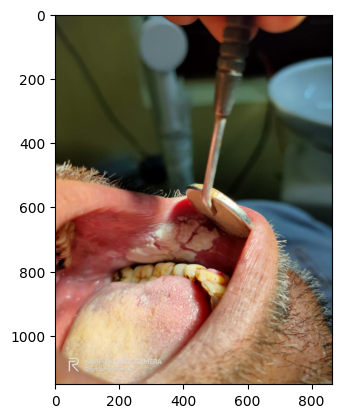

In [37]:
import matplotlib.image as mpimg 
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
%matplotlib inline


print('Cancer Images: ')
for img in cancer_imgs[:3]:
  testim = mpimg.imread(img)
  plt.figure()
  imshow(testim)

In [61]:
dataset = np.array(dataset)
labels = np.array(labels)

# Number of folds for cross-validation
num_folds = 10

# Initialize k-fold cross-validation
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Initialize lists to store evaluation metrics
accuracy_scores = []
classification_reports = []

# Perform k-fold cross-validation
for train_index, test_index in kf.split(dataset):
    # Split the dataset into training and testing sets
    X_train, X_test = dataset[train_index], dataset[test_index]
    y_train, y_test = labels[train_index], labels[test_index]

    # Initialize Decision Tree model
    dt_model = DecisionTreeClassifier(random_state=42)

    # Train the Decision Tree model
    dt_model.fit(X_train.reshape(X_train.shape[0], -1), y_train)

    # Make predictions on the test set
    y_pred = dt_model.predict(X_test.reshape(X_test.shape[0], -1))

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    classification_reports.append(classification_report(y_test, y_pred))
    accuracy_scores.append(accuracy)

# Print average accuracy and classification report across folds
print(f"Average Accuracy: {np.mean(accuracy_scores):.4f}")
print("\nAverage Classification Report:")
print("\n".join(classification_reports))
joblib.dump(dt_model,"../Models/oc_dt_model.keras")

Average Accuracy: 0.7300

Average Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       0.88      1.00      0.93         7

    accuracy                           0.90        10
   macro avg       0.94      0.83      0.87        10
weighted avg       0.91      0.90      0.89        10

              precision    recall  f1-score   support

           0       0.50      0.50      0.50         4
           1       0.67      0.67      0.67         6

    accuracy                           0.60        10
   macro avg       0.58      0.58      0.58        10
weighted avg       0.60      0.60      0.60        10

              precision    recall  f1-score   support

           0       0.50      0.75      0.60         4
           1       0.75      0.50      0.60         6

    accuracy                           0.60        10
   macro avg       0.62      0.62      0.60        10
weighted avg     

['../Models/oc_dt_model.keras']

In [62]:

from sklearn.ensemble import RandomForestClassifier
# Convert the list to a NumPy array
dataset = np.array(dataset)
labels = np.array(labels)

# Number of folds for cross-validation
num_folds = 10

# Initialize k-fold cross-validation
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Initialize lists to store evaluation metrics
accuracy_scores = []
classification_reports = []

# Perform k-fold cross-validation
for train_index, test_index in kf.split(dataset):
    # Split the dataset into training and testing sets
    X_train, X_test = dataset[train_index], dataset[test_index]
    y_train, y_test = labels[train_index], labels[test_index]

    # Initialize Random Forest model
    rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

    # Train the Random Forest model
    rf_model.fit(X_train.reshape(X_train.shape[0], -1), y_train)

    # Make predictions on the test set
    y_pred = rf_model.predict(X_test.reshape(X_test.shape[0], -1))

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    classification_reports.append(classification_report(y_test, y_pred))
    accuracy_scores.append(accuracy)

# Print average accuracy and classification report across folds
print(f"Average Accuracy: {np.mean(accuracy_scores):.4f}")
print("\nAverage Classification Report:")
print("\n".join(classification_reports))
joblib.dump(rf_model,"../Models/oc_rf_model.keras")

Average Accuracy: 0.7600

Average Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.67      0.67         3
           1       0.86      0.86      0.86         7

    accuracy                           0.80        10
   macro avg       0.76      0.76      0.76        10
weighted avg       0.80      0.80      0.80        10

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.56      0.83      0.67         6

    accuracy                           0.50        10
   macro avg       0.28      0.42      0.33        10
weighted avg       0.33      0.50      0.40        10

              precision    recall  f1-score   support

           0       0.60      0.75      0.67         4
           1       0.80      0.67      0.73         6

    accuracy                           0.70        10
   macro avg       0.70      0.71      0.70        10
weighted avg     

['../Models/oc_rf_model.keras']

In [63]:
# Convert the list to a NumPy array
dataset = np.array(dataset)
labels = np.array(labels)

# Number of folds for cross-validation
num_folds = 5

# Initialize k-fold cross-validation
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Initialize lists to store evaluation metrics
accuracy_scores = []
classification_reports = []

# Perform k-fold cross-validation
for train_index, test_index in kf.split(dataset):
    # Split the dataset into training and testing sets
    X_train, X_test = dataset[train_index], dataset[test_index]
    y_train, y_test = labels[train_index], labels[test_index]

    # Initialize SVM model
    svm_model = SVC(kernel='linear', C=1.0)

    # Train the SVM model
    svm_model.fit(X_train.reshape(X_train.shape[0], -1), y_train)

    # Make predictions on the test set
    y_pred = svm_model.predict(X_test.reshape(X_test.shape[0], -1))

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    classification_reports.append(classification_report(y_test, y_pred))
    accuracy_scores.append(accuracy)

# Print average accuracy and classification report across folds
print(f"Average Accuracy: {np.mean(accuracy_scores):.4f}")
print("\nAverage Classification Report:")
print("\n".join(classification_reports))
joblib.dump(svm_model,"../Models/oc_svm_model.keras")

Average Accuracy: 0.7500

Average Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.86      0.71         7
           1       0.90      0.69      0.78        13

    accuracy                           0.75        20
   macro avg       0.75      0.77      0.74        20
weighted avg       0.80      0.75      0.76        20

              precision    recall  f1-score   support

           0       0.88      0.88      0.88         8
           1       0.92      0.92      0.92        12

    accuracy                           0.90        20
   macro avg       0.90      0.90      0.90        20
weighted avg       0.90      0.90      0.90        20

              precision    recall  f1-score   support

           0       0.50      0.33      0.40         6
           1       0.75      0.86      0.80        14

    accuracy                           0.70        20
   macro avg       0.62      0.60      0.60        20
weighted avg     

['../Models/oc_svm_model.keras']

In [41]:

def load_and_convert_to_gray(img_path):
    img = Image.open(img_path).convert('L')  # 'L' mode stands for grayscale
    img_array = image.img_to_array(img.resize((64, 64)))  # Resize to desired dimensions
    return img_array

dataset = []
labels = []


for img in cancer_imgs:
    img_array = load_and_convert_to_gray(img)
    dataset.append(img_array)
    labels.append(1)

for img in non_cancer_imgs:
    img_array = load_and_convert_to_gray(img)
    dataset.append(img_array)
    labels.append(0)

dataset = array(dataset)
labels = np.array(labels)
labels_one_hot = to_categorical(labels, num_classes=2)

X_train, X_test, y_train, y_test = train_test_split(dataset, labels_one_hot, test_size=0.3, random_state=42)

time_steps = X_train.shape[1]
features = X_train.shape[2]

lstm_model = Sequential()
lstm_model.add(LSTM(32, input_shape=(time_steps, features), activation='relu', return_sequences=True))
lstm_model.add(LSTM(16, activation='relu'))
lstm_model.add(Dense(32, activation='relu'))
lstm_model.add(Dense(2, activation='softmax'))

lstm_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

lstm_model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping])

loss_lstm, accuracy_lstm = lstm_model.evaluate(X_test, y_test)
print(f'Test Loss: {loss_lstm:.4f}, Test Accuracy: {accuracy_lstm:.4f}')

evaluate_model(lstm_model, X_test, y_test, "LSTM")


Epoch 1/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 189ms/step - accuracy: 0.4246 - loss: 1018.0902 - val_accuracy: 0.2000 - val_loss: 711.0911
Epoch 2/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.5260 - loss: 458.4197 - val_accuracy: 0.3667 - val_loss: 209.1645
Epoch 3/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.5709 - loss: 133.2428 - val_accuracy: 0.4000 - val_loss: 295.7613
Epoch 4/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.4811 - loss: 173.6580 - val_accuracy: 0.5667 - val_loss: 122.1353
Epoch 5/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.4961 - loss: 98.2581 - val_accuracy: 0.6333 - val_loss: 37.3092
Epoch 6/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.4363 - loss: 50.0695 - val_accuracy: 0.4333 - val_loss: 64.0562
Epoch 7/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.5000 - loss: 125.7675 - val_accuracy: 0.5000 - val_loss: 81.9246
Epoch 8/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.5377 - loss: 133.1952 - val_accuracy:

In [42]:
#import our data
train_datagen = ImageDataGenerator(
    rescale=1. / 255,rotation_range=10, fill_mode='nearest',
     featurewise_center=True,
    featurewise_std_normalization=True,
    vertical_flip= True,
    shear_range=0.2,
    zoom_range=0.2,
    brightness_range = (0.4,0.6),
    horizontal_flip=True,validation_split=0.3)

In [13]:
train_generator = train_datagen.flow_from_directory(
    '../Dataset/OralCancer/',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',subset='training'
  )

Found 92 images belonging to 2 classes.


In [43]:
test_generator = train_datagen.flow_from_directory(
     '../Dataset/OralCancer/',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',subset='validation'
    
  )

Found 39 images belonging to 2 classes.


Found 131 files belonging to 2 classes.


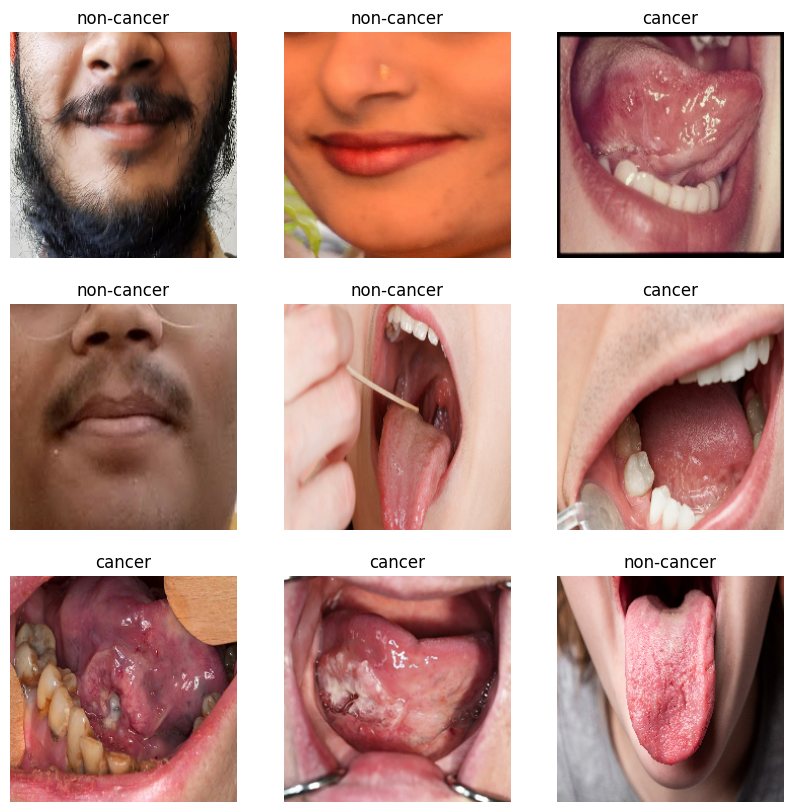

In [44]:
train_dataset = image_dataset_from_directory('../Dataset/OralCancer/',
                                             shuffle=True,
                                             batch_size=32,image_size=(224,224))
class_name =  train_dataset.class_names
plt.figure(figsize = (10,10))
for image , label in train_dataset.take(1):
    for i in range(9) :
        plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype("uint8"))
        plt.title(class_name[label[i]])
        plt.axis("off")

In [45]:
res_model = ResNet50(
    include_top=False,
    weights="imagenet",
    input_tensor=k.Input(shape=(224,224,3)),
)
for models in res_model.layers[:-1]:
      models.trainable= False
model = k.models.Sequential()
model.add(res_model)
model.add(k.layers.Flatten())
model.add(k.layers.Dense(4, activation='softmax'))
print(model.summary())

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ (None, 7, 7, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 100352)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 4)              │       401,412 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,989,124 (91.51 MB)

 Trainable params: 401,412 (1.53 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

None


In [46]:
model.compile(optimizer="adam", loss=k.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])
early = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=5,restore_best_weights=True)

In [47]:
FIT =model.fit(train_generator,
    validation_data = test_generator, 
    callbacks = [early],
    epochs = 5)

Epoch 1/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 11s 3s/step - accuracy: 0.5280 - loss: 2.6660 - val_accuracy: 0.3333 - val_loss: 3.5796
Epoch 2/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step - accuracy: 0.4569 - loss: 3.3713 - val_accuracy: 0.6667 - val_loss: 4.5703
Epoch 3/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 3s/step - accuracy: 0.6820 - loss: 3.9574 - val_accuracy: 0.6667 - val_loss: 1.0702
Epoch 4/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 3s/step - accuracy: 0.5077 - loss: 2.0623 - val_accuracy: 0.3333 - val_loss: 2.0072
Epoch 5/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 3s/step - accuracy: 0.4803 - loss: 1.6583 - val_accuracy: 0.6667 - val_loss: 2.4389


In [48]:
class_name = {0:"cancer",1:"non cancer"}

In [49]:
y = model.predict(test_generator)
y =  np.argmax(y,axis= 1 )

2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step


In [50]:
y_true = np.array([])
y_pred = np.array([])

i = 0
for data, labels in test_generator:
    i += 1
    y = np.argmax(model.predict(data), axis=1)
    y_true = np.append(y_true, labels)
    y_pred = np.append(y_pred, y)
  
    if i == test_generator.samples // 32 + 1:
        break

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


In [51]:
f1 = f1_score(y_pred, y_true, average='weighted')
precision = precision_score(y_pred, y_true, average='weighted')
print("F1 Score ", f1)
print("Precision ", precision)

F1 Score  0.8
Precision  1.0


In [52]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report

# Define the CNN model
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(
    optimizer=Adam(learning_rate=0.001), 
    loss='binary_crossentropy', 
    metrics=['accuracy']
)

# Set up early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(train_generator, epochs=15, validation_data=test_generator, callbacks=[early_stopping])

# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}')

# Print classification report
y_pred = (model.predict(test_generator) > 0.5).astype("int32")

f1 = f1_score(y_pred, y_true, average='weighted')
precision = precision_score(y_pred, y_true, average='weighted')
recall=recall_score(y_pred, y_true, average='weighted')
accuracy = accuracy_score(y_pred,y_true)
print("F1 Score ", f1)
print("Precision ", precision)
print("Recall score",recall)
print("Accuracy",accuracy)

Epoch 1/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step - accuracy: 0.5323 - loss: 0.9071 - val_accuracy: 0.3590 - val_loss: 0.7917
Epoch 2/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.5295 - loss: 0.9910 - val_accuracy: 0.3333 - val_loss: 0.8252
Epoch 3/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step - accuracy: 0.5739 - loss: 0.7048 - val_accuracy: 0.3333 - val_loss: 0.7627
Epoch 4/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step - accuracy: 0.6698 - loss: 0.6041 - val_accuracy: 0.3077 - val_loss: 0.7118
Epoch 5/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 2s/step - accuracy: 0.7337 - loss: 0.5649 - val_accuracy: 0.3077 - val_loss: 0.7061
Epoch 6/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.7985 - loss: 0.4823 - val_accuracy: 0.3333 - val_loss: 0.7120
Epoch 7/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 2s/step - accuracy: 0.8336 - loss: 0.3902 - val_accuracy: 0.3590 - val_loss: 0.7171
Epoch 8/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.8123 - loss: 0.4333 - val_accuracy: 0.2821 - val_loss: 0.7188
Epoch 9/15
3/3 ━

In [53]:
from tensorflow.keras.applications import EfficientNetB3
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report

# Assuming 'train_generator' is used for training and 'test_generator' for testing
# Assuming you have determined 'num_classes' based on your data
num_classes = 2

# Build the EfficientNetB3 model
efficientnet_model = EfficientNetB3(include_top=False, weights='imagenet', input_shape=(224, 224, 3))

# Freeze the layers of the pre-trained model
for layer in efficientnet_model.layers:
    layer.trainable = False

# Build your model on top of EfficientNetB3
model = Sequential()
model.add(efficientnet_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Set up early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(train_generator, epochs=15, validation_data=test_generator, callbacks=[early_stopping])

# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}')

# Print classification report
y_pred = model.predict(test_generator)
y_pred_classes = y_pred.argmax(axis=-1)



Epoch 1/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 21s 5s/step - accuracy: 0.5188 - loss: 0.7258 - val_accuracy: 0.6667 - val_loss: 0.6415
Epoch 2/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 3s/step - accuracy: 0.6899 - loss: 0.6302 - val_accuracy: 0.6667 - val_loss: 0.6427
Epoch 3/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 3s/step - accuracy: 0.6544 - loss: 0.6536 - val_accuracy: 0.6667 - val_loss: 0.6474
Epoch 4/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 3s/step - accuracy: 0.6826 - loss: 0.6336 - val_accuracy: 0.6667 - val_loss: 0.6360
Epoch 5/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 3s/step - accuracy: 0.6596 - loss: 0.6482 - val_accuracy: 0.6667 - val_loss: 0.6493
Epoch 6/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 3s/step - accuracy: 0.6310 - loss: 0.6634 - val_accuracy: 0.6667 - val_loss: 0.6536
Epoch 7/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 3s/step - accuracy: 0.6617 - loss: 0.6669 - val_accuracy: 0.6667 - val_loss: 0.6349
Epoch 8/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 3s/step - accuracy: 0.6262 - loss: 0.6625 - val_accuracy: 0.6667 - val_loss: 0.6518
Epoch 9/15
3/3 

In [54]:
from tensorflow.keras.applications import VGG19
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report

# Assuming 'train_generator' is used for training and 'test_generator' for testing
# Assuming you have determined 'num_classes' based on your data
num_classes = 2

# Build the VGG19 model
vgg19_model = VGG19(include_top=False, weights='imagenet', input_shape=(224, 224, 3))

# Freeze the layers of the pre-trained model
for layer in vgg19_model.layers:
    layer.trainable = False

# Build your model on top of VGG19
model = Sequential()
model.add(vgg19_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(32, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(
    optimizer=Adam(learning_rate=0.001),   # ✅ Use learning_rate, not lr
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Set up early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(train_generator, epochs=10, validation_data=test_generator, callbacks=[early_stopping])

# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}')

# Print classification report
y_pred = model.predict(test_generator)
y_pred_classes = y_pred.argmax(axis=-1)



Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 27s 11s/step - accuracy: 0.5416 - loss: 0.6786 - val_accuracy: 0.6667 - val_loss: 0.6424
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 27s 10s/step - accuracy: 0.6323 - loss: 0.6690 - val_accuracy: 0.6667 - val_loss: 0.6425
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 27s 10s/step - accuracy: 0.6803 - loss: 0.6208 - val_accuracy: 0.6667 - val_loss: 0.6369
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 27s 10s/step - accuracy: 0.6557 - loss: 0.6391 - val_accuracy: 0.6667 - val_loss: 0.6199
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 27s 11s/step - accuracy: 0.6762 - loss: 0.6184 - val_accuracy: 0.6667 - val_loss: 0.6258
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 28s 11s/step - accuracy: 0.6815 - loss: 0.6152 - val_accuracy: 0.6667 - val_loss: 0.6226
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 27s 10s/step - accuracy: 0.6503 - loss: 0.6189 - val_accuracy: 0.6667 - val_loss: 0.6183
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 27s 10s/step - accuracy: 0.6664 - loss: 0.6037 - val_accuracy: 0.6667 - val_loss: 0.6087
